<a href="https://colab.research.google.com/github/Rojika1/AI-Lab-3-KNN-Implementation-Rojika-Gauro/blob/main/KNN_Arbitrary_point(2D)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted Label for test point [24, 25000] is: B


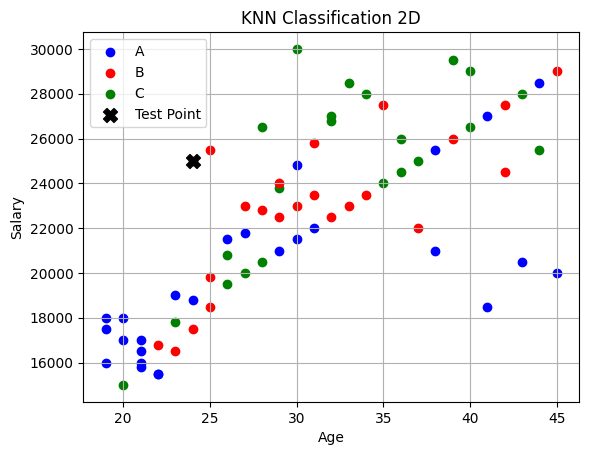

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("/content/knndataset.csv")

training_data = df[['Age', 'Salary']].values.tolist()
training_labels = df['Label'].tolist()

test_point = [24, 25000]

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def generate_k(n_samples):
    k = int(np.sqrt(n_samples))
    if k % 2 == 0:
        k += 1
    return max(1, k)

def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

k = generate_k(len(training_data))
prediction = knn_predict(training_data, training_labels, test_point, k)
print(f"Predicted Label for test point {test_point} is: {prediction}")

unique_labels = list(set(training_labels))
colors = ['red', 'green', 'blue', 'orange', 'purple']
label_colors = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

for i in range(len(training_data)):
    plt.scatter(training_data[i][0], training_data[i][1],
                color=label_colors[training_labels[i]],
                label=training_labels[i] if training_labels[i] not in training_labels[:i] else "")

plt.scatter(test_point[0], test_point[1], color='black', label='Test Point', marker='X', s=100)

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN Classification 2D')
plt.legend()
plt.grid(True)
plt.show()